In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [110]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [111]:
data.shape

(1462, 9)

In [112]:
data.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [113]:
cat_features = ['lead_source','industry','employment_status','location']
num_features = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']

In [114]:
data[cat_features] = data[cat_features].fillna('NA')

In [115]:
data[cat_features].isnull().sum()

lead_source          0
industry             0
employment_status    0
location             0
dtype: int64

In [116]:
data[num_features] = data[num_features].fillna(0)
data[num_features].isnull().sum()

number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64

In [117]:
statistics.mode(data.industry.tolist())

'retail'

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


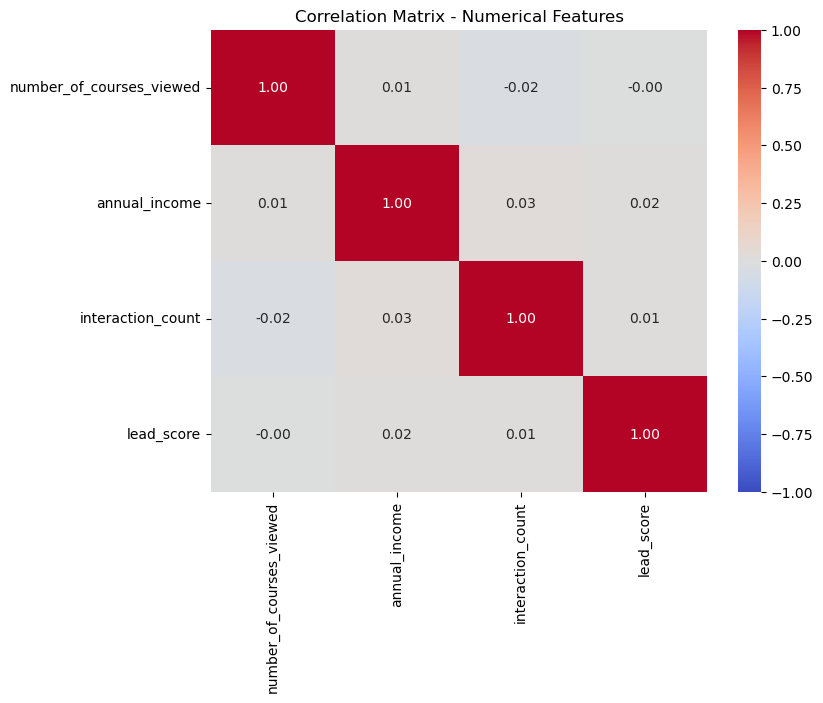

In [118]:
import seaborn as sns

# compute correlation matrix for numerical features and display it
corr_matrix = data[num_features].corr()
print(corr_matrix)

# optional: visualize as a heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix - Numerical Features")
plt.show()

In [119]:
# prepare features and target (ensure target is not in X)
X = data
y = data['converted']

# first split: train (60%) and temp (40%)
df_full_train, df_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# second split: val (20%) and test (20%) -> split temp in half
df_val, df_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [120]:
df_train = df_full_train.drop(columns=['converted'])
df_val = df_val.drop(columns=['converted'])
df_test = df_test.drop(columns=['converted'])

In [121]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [122]:
mi = df_full_train[cat_features].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

lead_source          0.028192
employment_status    0.018339
industry             0.015059
location             0.003457
dtype: float64

In [123]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_train

array([[6.1705e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.5199e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.0841e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [5.6402e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.5688e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.3862e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [124]:
val_dicts = df_val.to_dict(orient='records')
dv.fit(val_dicts)
X_val = dv.transform(val_dicts)
X_val

array([[6.3127e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.5389e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.0000e+00],
       [6.6519e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [2.6839e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0000e+00]])

In [125]:
model =  LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [126]:
model.intercept_[0].round(3)

-0.059

In [127]:
model.coef_[0].round(3)

array([-0.   , -0.014,  0.03 ,  0.018,  0.012, -0.106, -0.021,  0.054,
       -0.025, -0.022, -0.011, -0.004, -0.016, -0.014,  0.299,  0.047,
        0.009, -0.014, -0.014, -0.096,  0.071, -0.015,  0.005, -0.014,
       -0.012, -0.01 ,  0.005,  0.007, -0.021, -0.018,  0.451])

In [128]:
model.predict_proba(X_train)

array([[0.4034568 , 0.5965432 ],
       [0.33161245, 0.66838755],
       [0.28613866, 0.71386134],
       ...,
       [0.61628953, 0.38371047],
       [0.42075643, 0.57924357],
       [0.42311263, 0.57688737]])

In [129]:
(X_val).shape

(292, 31)

In [131]:
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
converted_decision

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,

In [135]:
y_val = np.array(y_val)

In [136]:
converted_decision.astype(int)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [137]:
(y_val == converted_decision).mean()

0.7431506849315068

Q5

In [152]:
cat_features_Q5 = ['lead_score','industry','location']

In [154]:
df_train_q5 = df_train[cat_features_Q5]
df_val_q5 = df_val[cat_features_Q5]

train_dicts_q5 = df_train_q5.to_dict(orient='records')
dv.fit(train_dicts_q5)
X_train_q5 = dv.transform(train_dicts_q5)

val_dicts_q5 = df_val_q5.to_dict(orient='records')
dv.fit(val_dicts_q5)
X_val_q5 = dv.transform(val_dicts_q5)


In [155]:
model.fit(X_train_q5, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [156]:
y_pred_q5 = model.predict_proba(X_val_q5)[:, 1]
converted_decision_q5 = (y_pred_q5 >= 0.5)
converted_decision_q5.astype(int)
(y_val == converted_decision_q5).mean()

0.6267123287671232

Q6

In [173]:
model_q6 =  LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_q6.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [174]:
y_pred = model_q6.predict_proba(X_val)[:, 1]
converted_decision_q6 = (y_pred >= 0.5)
converted_decision_q6.astype(int)
(y_val == converted_decision_q6).mean()

0.7431506849315068